<a href="https://colab.research.google.com/github/anthonymelson/python-rl/blob/master/Using_the_N_Bernoulli_Bandit_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bernoulli Bandits Class**

The [Bernoulli Bandits](https://en.wikipedia.org/wiki/Multi-armed_bandit#Variations) Class defined below allows users to experiment with applying [Thompson Sampling](https://en.wikipedia.org/wiki/Thompson_sampling) to the classical multi-armed bandits problem of reinforcement learning (explore vs exploit).

It allows the user to select the number of bandits the agent can choose from and a range for the probabilities of winning for each machine to be selected from randomly.

This helps build an intuition about the limits of Thompson Sampling, thus helping practitoners to apply the technique more effectively.  For instance, in website optimization it is beneficial to know how many variations that are how close in likelihood to convert can be tested effectively at once, and how well Thompson Sampling will do at finding the best choice and/or limiting regret.

It is the authors belief that web optimization is a truly online problem and that Thompson Sampling is superior to A/B testing for this purpose (though less used).  Also, that reinforcement learning, broadly, will surpass traditional methods and that Thompson Sampling is a perfect place to start for beginners.

## **Python Implementation**

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

class N_Bernoulli_Bandit:
    def __init__(self, total_reward = 0, rounds = 0, num_machines = 3, machine_played = [], wins = [], losses = [], machine_probs = []):

        self.total_reward = total_reward
        self.machine_played = machine_played
        self.wins = wins
        self.losses = losses
        self.machine_probs = machine_probs
        self.rounds = rounds
        self.num_machines = num_machines

    def simulate(self, num_machines = 3, rounds = 1000, prob_range = [0,1]):
        self.num_machines = num_machines
        machine_probs = np.random.uniform(low=prob_range[0], high=prob_range[1], size=num_machines).round(2) # Win Probability of Machines
        wins = np.zeros(num_machines) #Tracks Wins for Each Machine
        losses = np.zeros(num_machines) # Tracks Losses for Each Machine
        total_reward = 0 # Tracks Overall Wins for All Rounds
        machine_played = [] # Tracks Total Plays for Each Machine

        # Iterate Through Rounds
        for i in range(0, rounds):
            probs = np.zeros(num_machines) # Store Each Machine's Draw to be Played
            
            # Iterate Through Machines
            for machine in range(0, num_machines):
                probs[machine] = random.betavariate(wins[machine] + 1, losses[machine] + 1) # Draw Based on Previous Results and Randomness

            selected_machine = np.argmax(probs) # Machine With Best Draw
            machine_played.append(selected_machine) # Collect Machine With Best Draw

            # Simulate Playing the Selected Machine, and Collect Reward
            reward = np.random.choice([0,1],1, p = [1 - machine_probs[selected_machine], machine_probs[selected_machine]])

            # Count Wins, Losses, and Reward
            if reward == 1:
                wins[selected_machine] = wins[selected_machine] + 1
            else:
                losses[selected_machine] = losses[selected_machine] + 1
            total_reward = total_reward + reward

        self.total_reward = total_reward
        self.machine_played = machine_played
        self.wins = wins
        self.losses = losses
        self.machine_probs = machine_probs
        self.rounds = rounds

        return

    def summary(self):
        # Create and Print DataFrame with Regret, Wins, Losses, and Probabilities of Machine
        regret = (max(self.machine_probs) * self.rounds) - self.total_reward
        df = pd.DataFrame(self.wins, columns=['Wins'])
        df['Losses'] = self.losses
        df['Actual Prob'] = self.machine_probs
        display(df)
        print()
        print(f"Machine {np.argmax(self.wins)} won most, with {int(self.wins[np.argmax(self.wins)])} wins")
        print(f"Machine {np.argmax(self.machine_probs)} had the highest payout")
        print(f"Total Reward: {self.total_reward[0]}")
        print(f"Total Regret: {regret[0]}")

    def hist_plot(self):
        # Plot Histogram of Total Plays For Each Machine
        plt.hist(self.machine_played, bins=self.num_machines)
        plt.title('Histogram of Machine Plays')
        plt.xlabel('Machines')
        plt.ylabel('Number of Times Selected')
        plt.show()

First, we can try:



*   15 bandits
*   probabilities between 0.5 and 0.7
*   5,000 iterations

These numbers may not seem significant, until they are compared to A/B testing.  In that context, it is clear that almost nobody would ever test 15 variations that were expected to be almost equally likely to one another in one test, even if the sample size was 5,000.  Furthermore, each would have to be tried *too* many times for the experimenter to think the site would perform very well in the meantime.

Let's see how Thompson Sampling fairs!


,Wins,Losses,Actual Prob
0,55.0,41.0,0.61
1,53.0,44.0,0.57
2,36.0,31.0,0.53
3,23.0,23.0,0.57
4,17.0,21.0,0.54
5,1840.0,841.0,0.67
6,61.0,43.0,0.51
7,28.0,27.0,0.56
8,12.0,16.0,0.55
9,108.0,72.0,0.55



Machine 5 won most, with 1840 wins
Machine 5 had the highest payout
Total Reward: 3267
Total Regret: 83.0


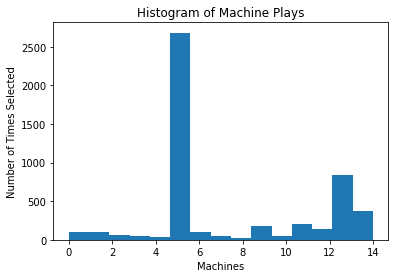

In [11]:
bb = N_Bernoulli_Bandit()
bb.simulate(num_machines=15, rounds=5000, prob_range=[0.5, 0.7])
bb.summary()
bb.hist_plot()

Thompson Sampling was able to find the best bandit was 5, despite the fact that 13 was only 2% less likely to pay out and the fact that half of the other options had payour probabilities within 10% of it.

Furthermore, of those that were not 5, the two levers that were clearly favored were the second and third best choices, which minimized the algorithms losses in the process of learning about lever 5's dominance!

Now, we can try:

*   10 bandits
*   probabilities between 0.2 and 0.8
*   100 iterations

,Wins,Losses,Actual Prob
0,2.0,2.0,0.56
1,63.0,13.0,0.77
2,6.0,4.0,0.60
3,0.0,2.0,0.48
4,0.0,2.0,0.35
5,13.0,8.0,0.52
6,7.0,5.0,0.59
7,0.0,2.0,0.38
8,0.0,3.0,0.43
9,11.0,7.0,0.49



Machine 1 won most, with 63 wins
Machine 1 had the highest payout
Total Reward: 102
Total Regret: 13.5


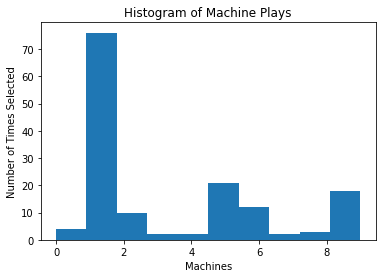

In [18]:
bb = N_Bernoulli_Bandit()
bb.simulate(num_machines=10, rounds=150, prob_range=[0.2, 0.8])
bb.summary()
bb.hist_plot()

Again Thompson Sampling found the top performing machine and mostly played it.  Addtionally, half of the machine probabilities were below 50% and the other half (including number 1) were above, and of the 150 pulls, only 27 were on machines below 50%.  This is not only impressive, but also saves the user a ton of money.

First, we can try:

*   10 bandits
*   probabilities between 0.5 and 0.7
*   100 iterations

Let's see if it can handle such a tall order?

,Wins,Losses,Actual Prob
0,5.0,6.0,0.53
1,8.0,5.0,0.66
2,3.0,3.0,0.70
3,2.0,4.0,0.63
4,0.0,2.0,0.68
5,1.0,3.0,0.51
6,5.0,6.0,0.54
7,6.0,4.0,0.51
8,17.0,8.0,0.66
9,7.0,5.0,0.70



Machine 8 won most, with 17 wins
Machine 2 had the highest payout
Total Reward: 54
Total Regret: 16.0


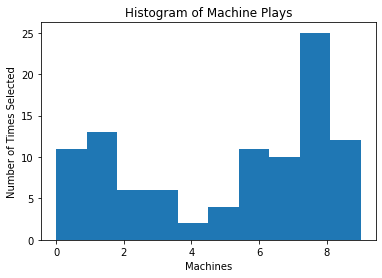

In [6]:
bb = N_Bernoulli_Bandit()
bb.simulate(num_machines=10, rounds=100, prob_range=[0.5, 0.7])
bb.summary()
bb.hist_plot()

Not quite!  it primarily played 8, while 2 was the dominant machine.  Additionally, in only 100 rounds (with a best machine of 70% win percentage, thus 70 possible points), it accumulated 16 regret.

The point here is not to show that Thompson Sampling isn't a great tool (it is!), or that there is another tool (i.e. A/B testing) that could do better at deciding between 10 options that are close to equal.  It is only to show that Thompson Sampling has its limits as well!

More importantly, I wanted to show off the functions and set up the possiblility to analyze it's limits more rigorously sometime in the future (which has not been done in the literature)!